# 🎬 CinemaScope: Evolving Movie Trends (1990–2025)

`Author`: Neehanth Reddy

## 📌 Objective
Explore how movie trends have evolved from 1990 to 2025 using Python, including genre popularity, rating trends, and seasonal patterns.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set the style for seaborn
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

### Initial Data Exploration

#### Basic Data Inspection

In [3]:
# Load the dataset
movies_df = pd.read_csv('../data/tmdb_movies_1990_2025.csv')
movies_df.head()

,id,title,original_title,overview,release_date,original_language,popularity,vote_average,vote_count,adult,genres,runtime,budget,revenue,production_countries,spoken_languages
0,769,GoodFellas,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",1990-09-12,en,14.2448,8.500,13438,False,"['Drama', 'Crime']",145,25000000,46800000,['United States of America'],"['Italiano', 'English']"
1,162,Edward Scissorhands,Edward Scissorhands,A small suburban town receives a visit from a ...,1990-12-07,en,12.5366,7.718,13181,False,"['Fantasy', 'Drama', 'Romance']",105,20000000,86024005,['United States of America'],['English']
2,114,Pretty Woman,Pretty Woman,"While on a business trip in Los Angeles, Edwar...",1990-03-23,en,11.8131,7.463,8535,False,"['Romance', 'Comedy']",120,14000000,463406268,['United States of America'],['English']
3,242,The Godfather Part III,The Godfather Part III,In the midst of trying to legitimize his busin...,1990-12-25,en,12.4323,7.417,6430,False,"['Crime', 'Drama', 'Thriller']",162,54000000,136766062,['United States of America'],"['English', 'Italiano', 'Deutsch', 'Latin']"
4,251,Ghost,Ghost,"After a young man is murdered, his spirit stay...",1990-07-13,en,10.4482,7.226,5718,False,"['Fantasy', 'Drama', 'Thriller', 'Mystery', 'R...",126,22000000,505000000,['United States of America'],['English']


In [4]:
movies_df.tail()

,id,title,original_title,overview,release_date,original_language,popularity,vote_average,vote_count,adult,genres,runtime,budget,revenue,production_countries,spoken_languages
17993,1192174,The Negotiator,Il nibbio,"In 2005, Italian journalist Giuliana Sgrena wa...",2025-03-06,it,2.6847,7.400,30,False,"['Drama', 'Thriller']",109,0,0,"['Italy', 'Belgium']",['Italiano']
17994,1450379,King of Painting,大画王,"Ke Huan is a talented and dreamy painter, but ...",2025-03-21,zh,2.1359,5.000,5,False,"['Adventure', 'Science Fiction']",0,0,0,['China'],['普通话']
17995,1392117,Cooked,Umami,Chef and owner Sina Bora faces personal and pr...,2025-02-11,tr,2.2176,5.900,26,False,['Drama'],120,0,0,['Turkey'],['Türkçe']
17996,1278965,The Stone,เดอะ สโตน พระแท้ คนเก๊,When Ake desperately needs money to pay for hi...,2025-04-03,th,2.4234,6.800,4,False,"['Crime', 'Thriller', 'Drama']",119,0,0,['Thailand'],['ภาษาไทย']
17997,1075456,O'Dessa,O'Dessa,A farm girl is on an epic quest to recover a c...,2025-03-08,en,2.6342,5.873,71,False,"['Music', 'Drama', 'Science Fiction']",106,0,0,"['United States of America', 'Brazil']",['English']


10,000 popular and trending movies and 10 attributes (features)

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17998 non-null  int64  
 1   title                 17998 non-null  object 
 2   original_title        17998 non-null  object 
 3   overview              17879 non-null  object 
 4   release_date          17998 non-null  object 
 5   original_language     17998 non-null  object 
 6   popularity            17998 non-null  float64
 7   vote_average          17998 non-null  float64
 8   vote_count            17998 non-null  int64  
 9   adult                 17998 non-null  bool   
 10  genres                17998 non-null  object 
 11  runtime               17998 non-null  int64  
 12  budget                17998 non-null  int64  
 13  revenue               17998 non-null  int64  
 14  production_countries  17998 non-null  object 
 15  spoken_languages   

In [6]:
movies_df.describe()

,id,popularity,vote_average,vote_count,runtime,budget,revenue
count,1.799800e+04,17998.000000,17998.000000,17998.000000,17998.000000,1.799800e+04,1.799800e+04
mean,2.778713e+05,3.749142,6.064967,1007.967441,101.515557,1.368127e+07,3.694674e+07
std,3.505544e+05,12.383232,1.488951,2522.759481,28.070323,3.248092e+07,1.239848e+08
min,5.000000e+00,0.364900,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.144850e+04,1.390275,5.600000,23.000000,90.000000,0.000000e+00,0.000000e+00
50%,8.387700e+04,2.081800,6.301000,165.000000,100.000000,0.000000e+00,0.000000e+00
75%,4.404420e+05,3.450650,6.945750,777.000000,114.000000,1.200000e+07,1.697292e+07
max,1.499237e+06,851.071800,10.000000,37578.000000,625.000000,4.600000e+08,2.923706e+09


#### Data Quality Checks

In [7]:
# Identify missing values
movies_df.isnull().sum()

id                        0
title                     0
original_title            0
overview                119
release_date              0
original_language         0
popularity                0
vote_average              0
vote_count                0
adult                     0
genres                    0
runtime                   0
budget                    0
revenue                   0
production_countries      0
spoken_languages          0
dtype: int64

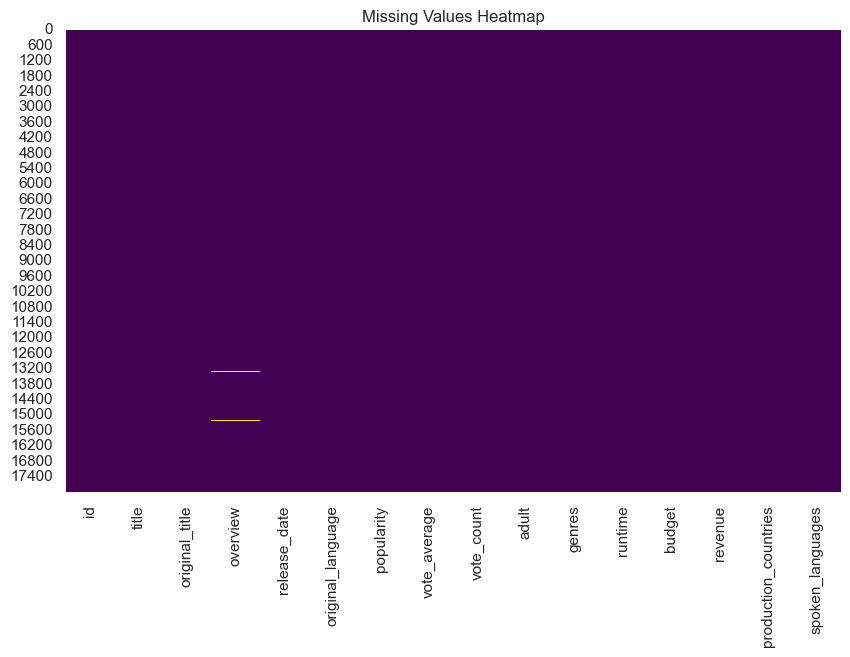

In [8]:
# Visualize missing values pattern
plt.figure(figsize=(10,6))
sns.heatmap(movies_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

NaN values are present in `overview`  column.

- `overview`: Fill missing overviews with a placeholder such as "No overview available" to avoid issues during processing.

In [9]:
# Check for duplicate entries
duplicates = movies_df[movies_df.duplicated()]
print(f"Total duplicate entries: {len(duplicates)}")

Total duplicate entries: 6


In [10]:
# Check for the count of categorical variables, numeric variables, and boolean variables
categorical_vars = movies_df.select_dtypes(include=['object']).columns
numeric_vars = movies_df.select_dtypes(include=[np.number]).columns
boolean_vars = movies_df.select_dtypes(include=['bool']).columns

print(f"Categorical variables: {len(categorical_vars)}")
print(f"Numeric variables: {len(numeric_vars)}")
print(f"Boolean variables: {len(boolean_vars)}")

Categorical variables: 8
Numeric variables: 7
Boolean variables: 1


In [11]:
print("Categorical features:", categorical_vars.tolist())
print("Numeric features:", numeric_vars.tolist())
print("Boolean features:", boolean_vars.tolist())

Categorical features: ['title', 'original_title', 'overview', 'release_date', 'original_language', 'genres', 'production_countries', 'spoken_languages']
Numeric features: ['id', 'popularity', 'vote_average', 'vote_count', 'runtime', 'budget', 'revenue']
Boolean features: ['adult']


#### Data Consistency and Formatting

In [12]:
# Convert release_date to datetime and extract features
movies_df['release_date'] = pd.to_datetime(
    movies_df['release_date'],
    errors='coerce'
)

movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df['release_month'] = movies_df['release_date'].dt.month
movies_df['release_day'] = movies_df['release_date'].dt.day

In [13]:
movies_df['release_date'].dtype

dtype('<M8[ns]')

In NumPy and Pandas, `dtype('<M8[ns]')` is a particular representation of a datetime object that uses little-endian byte ordering to store dates and times with nanosecond accuracy.  Datetime64[ns] is functionally equivalent to it.

In [14]:
# Check for non-exact duplicates (same title but different IDs)
title_dups = movies_df[movies_df.duplicated(subset=['title'], keep=False)]
print(f"Potential remakes/sequel: {len(title_dups)}")

# Examine most duplicated titles
print("\nMost common duplicate titles:\n", title_dups['title'].value_counts().head(10))

Potential remakes/sequel: 1280

Most common duplicate titles:
 title
Snow White     5
Pinocchio      4
Alone          4
12             4
Aladdin        4
Aftermath      4
Porno          4
Unstoppable    4
Cinderella     4
Together       4
Name: count, dtype: int64


In [15]:
movies_df[movies_df['title'] == 'Snow White']

,id,title,original_title,overview,release_date,original_language,popularity,vote_average,vote_count,adult,genres,runtime,budget,revenue,production_countries,spoken_languages,release_year,release_month,release_day
413,359921,Snow White,Snow White,Enter the spellbinding realm of a pretty young...,1990-09-14,en,0.6120,6.800,18,False,"['Music', 'Family', 'Animation', 'Fantasy']",49,0,0,['United States of America'],['English'],1990,9,14
2705,116743,Snow White,Snow White,A young princess named Snow White is sent away...,1995-04-27,en,1.5134,6.800,29,False,"['Animation', 'Drama', 'Family', 'Fantasy', 'M...",46,0,0,"['United States of America', 'Japan']",['Deutsch'],1995,4,27
5720,32593,Snow White,Snow White,"Snow White's mother dies during childbirth, le...",2001-10-28,en,1.7643,5.900,243,False,"['Adventure', 'Fantasy']",93,0,0,"['Canada', 'Germany', 'United States of America']",['English'],2001,10,28
17518,447273,Snow White,Snow White,"Following the benevolent King's disappearance,...",2025-03-12,en,100.8809,4.286,1183,False,"['Family', 'Fantasy']",109,270000000,205067778,['United States of America'],['English'],2025,3,12
17520,1449951,Snow White,Snow White,"When the Queen’s jealousy turns deadly, Snow W...",2025-03-07,en,94.1357,7.000,10,False,"['Animation', 'Family', 'Fantasy']",93,0,0,[],['English'],2025,3,7


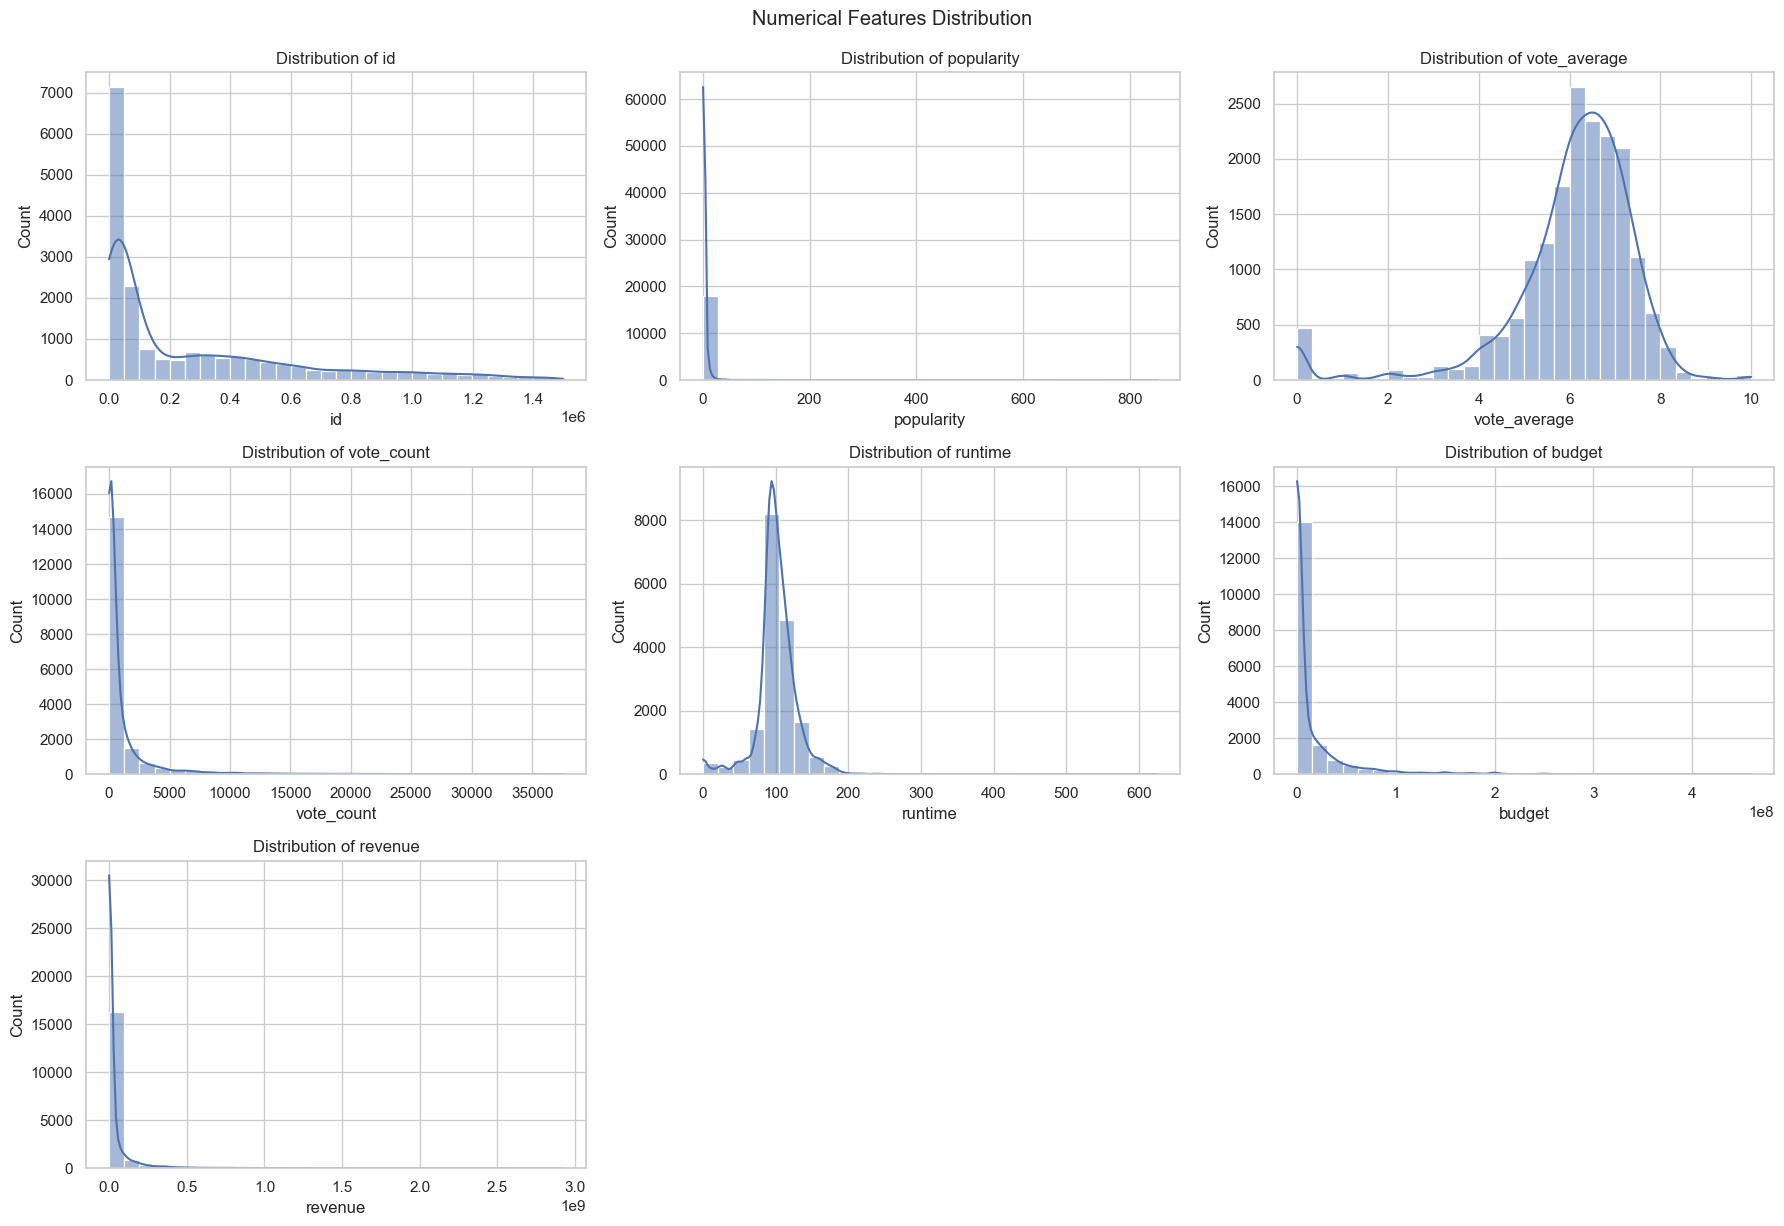

In [16]:
# Plot distributions for numerical features with x-axis as actual column values
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_vars):
    ax = axes[idx]
    sns.histplot(movies_df[col], bins=30, ax=ax, kde=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {col}')
    # Set x-axis ticks to actual values if unique values are not too many
    unique_vals = movies_df[col].dropna().unique()
    if len(unique_vals) <= 20:
        ax.set_xticks(sorted(unique_vals))

# Hide any unused subplots
for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Numerical Features Distribution', y=1.02)
plt.show()

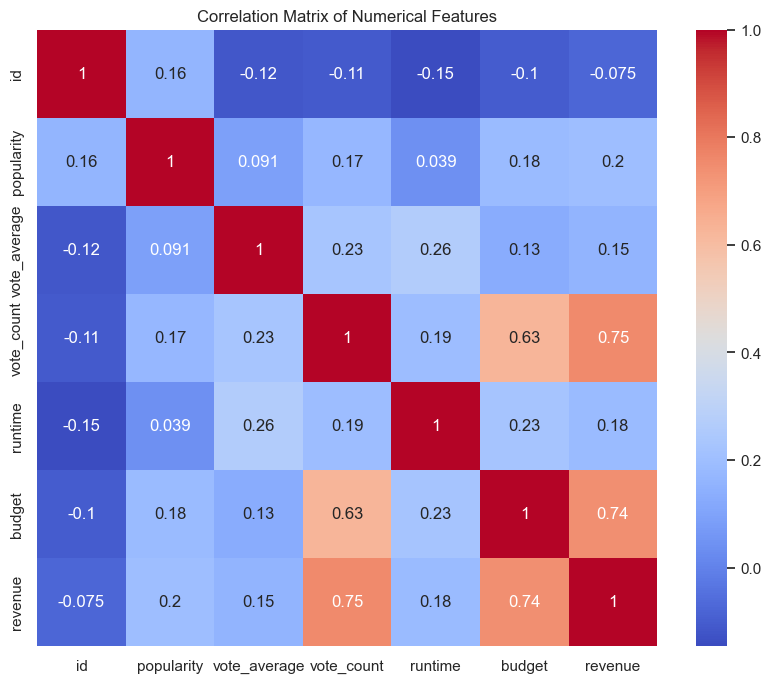

In [17]:
# Check for correlations
plt.figure(figsize=(10,8))
sns.heatmap(movies_df[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

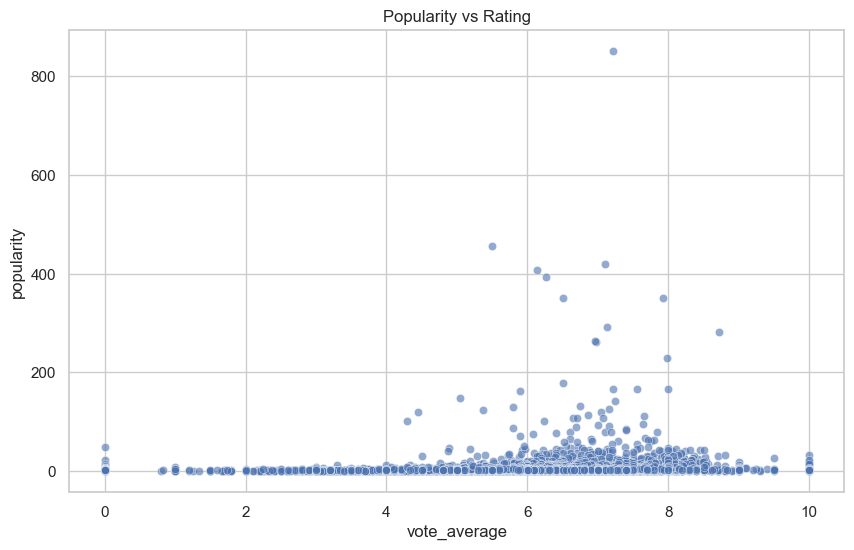

In [18]:
# Analyze popularity vs rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=movies_df, x='vote_average', y='popularity', alpha=0.6)
plt.title('Popularity vs Rating')
plt.show()

Regardless of the average rating, most films cluster at lower popularity levels.  High popularity is comparatively uncommon, as evidenced by the concentration of the majority of data points around the bottom of the plot.

A few outliers have significantly higher popularity scores (over 200, with one extreme case exceeding 1200), while the majority of films have minimal popularity (around zero).

Popularity and rating (vote_average) do not strongly correlate linearly.  While popular films do not necessarily have the highest ratings, high-rated films are not always popular, and some films with average ratings (about 6 to 8) do receive considerable popularity.

In [19]:
# Check if the ['genres', 'production_countries', 'spoken_languages'] columns has any empty lists
empty_genres = movies_df[movies_df['genres'].apply(lambda x: x == [])]
print(f"Movies with no genres: {len(empty_genres)}")

empty_countries = movies_df[movies_df['production_countries'].apply(lambda x: x == [])]
print(f"Movies with no production countries: {len(empty_countries)}")

empty_languages = movies_df[movies_df['spoken_languages'].apply(lambda x: x == [])]
print(f"Movies with no spoken languages: {len(empty_languages)}")

Movies with no genres: 0
Movies with no production countries: 0
Movies with no spoken languages: 0


### Data Cleaning

In [20]:
# Remove duplicates
movies_df_cleaned = movies_df.copy()
movies_df_cleaned = movies_df_cleaned.drop_duplicates()
print(f"Original records: {len(movies_df)}")
print(f"Duplicates were found and removed. Remaining records: {len(movies_df_cleaned)}")
print(f"Duplicate records after cleaning: {movies_df_cleaned.duplicated().sum()}")

Original records: 17998
Duplicates were found and removed. Remaining records: 17992
Duplicate records after cleaning: 0


In [21]:
# Handle Missing Values
# Fill missing values in 'overview' with a placeholder
if movies_df_cleaned['overview'].isnull().sum() != 0:
    movies_df_cleaned['overview'] = movies_df_cleaned['overview'].fillna('No overview available')
    print(f"Missing values in 'overview' column were filled with placeholder text.")   
else:
    print(f"No missing values in 'overview' column to fill.")

Missing values in 'overview' column were filled with placeholder text.


In [22]:
# id: Ensure integer or string type.
movies_df_cleaned['id'] = movies_df_cleaned['id'].astype(str)

In [23]:
# Check if the adult column has only one unique value and drop it if so or convert it to boolean
if movies_df_cleaned['adult'].nunique() == 1:
    movies_df_cleaned = movies_df_cleaned.drop(columns=['adult'])
    print("The 'adult' column had only one unique value and was dropped.")
else:
    movies_df_cleaned['adult'] = movies_df_cleaned['adult'].astype(bool)
    print("The 'adult' column was converted to boolean type.")

The 'adult' column had only one unique value and was dropped.


In [24]:
# Verify the data types
print("\nData types after cleaning:")
print(movies_df_cleaned.dtypes)


Data types after cleaning:
id                              object
title                           object
original_title                  object
overview                        object
release_date            datetime64[ns]
original_language               object
popularity                     float64
vote_average                   float64
vote_count                       int64
genres                          object
runtime                          int64
budget                           int64
revenue                          int64
production_countries            object
spoken_languages                object
release_year                     int32
release_month                    int32
release_day                      int32
dtype: object


In [25]:
# Final check for missing values
movies_df_cleaned.isnull().sum()

id                      0
title                   0
original_title          0
overview                0
release_date            0
original_language       0
popularity              0
vote_average            0
vote_count              0
genres                  0
runtime                 0
budget                  0
revenue                 0
production_countries    0
spoken_languages        0
release_year            0
release_month           0
release_day             0
dtype: int64

In [26]:
# Convert the 'genres' column from string representation to a list of genres
# This is necessary because the genres are stored as a string representation of a list in the dataset
# and we need to convert it to an actual list for further analysis.
import ast

movies_df_cleaned['genres'] = movies_df_cleaned['genres'].apply(ast.literal_eval)
unique_genres = set(g for genre_list in movies_df_cleaned['genres'] for g in genre_list)

print(f"Total unique genres found: {len(unique_genres)}")
for genre in unique_genres:
    print(genre)

Total unique genres found: 19
Science Fiction
Drama
Action
Romance
Fantasy
Adventure
Animation
Family
War
TV Movie
History
Comedy
Documentary
Crime
Western
Mystery
Thriller
Horror
Music


In [27]:
# Similarly, convert 'production_countries' and 'spoken_languages' columns to actual lists
movies_df_cleaned['production_countries'] = movies_df_cleaned['production_countries'].apply(ast.literal_eval)
movies_df_cleaned['spoken_languages'] = movies_df_cleaned['spoken_languages'].apply(ast.literal_eval)

In [28]:
unique_countries = set(c for country_list in movies_df_cleaned['production_countries'] for c in country_list)
print(f"Total unique production countries found: {len(unique_countries)}")
for country in unique_countries:
    print(country)

Total unique production countries found: 125
Bosnia and Herzegovina
Lebanon
Jordan
Uruguay
Andorra
Netherlands
Iraq
Belgium
Aruba
Morocco
East Germany
Honduras
Mexico
Poland
Namibia
China
Dominican Republic
Tunisia
Guatemala
France
Pakistan
Yugoslavia
Iran
Turkey
South Africa
Azerbaijan
Slovakia
Latvia
Spain
Czech Republic
Liechtenstein
Tokelau
Palestinian Territory
Malaysia
Bhutan
Colombia
Peru
Italy
Bulgaria
Ethiopia
Chile
Hungary
Greece
Tajikistan
Japan
Cuba
Indonesia
Israel
Denmark
Australia
Faeroe Islands
Jamaica
United Kingdom
Nigeria
Guinea
Malawi
Qatar
Puerto Rico
Ireland
Switzerland
Singapore
Estonia
Finland
Austria
Georgia
Taiwan
Luxembourg
Serbia
Panama
Thailand
Afghanistan
Bangladesh
Venezuela
Malta
Turks and Caicos Islands
Trinidad and Tobago
Kosovo
Bolivia
Portugal
Kenya
Norway
Cambodia
Vietnam
Ecuador
United Arab Emirates
Kazakhstan
Serbia and Montenegro
Bahamas
Grenada
Paraguay
Brazil
Macedonia
India
Albania
Philippines
South Korea
Slovenia
Montenegro
Hong Kong
Romania


In [29]:
unique_spoken_languages = set(l for language_list in movies_df_cleaned['spoken_languages'] for l in language_list)
print(f"Total unique spoken languages found: {len(unique_spoken_languages)}")
for language in unique_spoken_languages:
    print(language)

Total unique spoken languages found: 70

ਪੰਜਾਬੀ
English
Lietuvių
Український
Fulfulde
ภาษาไทย
Gaeilge
Galego
বাংলা
?????
हिन्दी
Bahasa indonesia
Pусский
Deutsch
shqip
Kiswahili
Türkçe
Srpski
euskera
Somali
Norsk
Italiano
Český
Nederlands
Polski
isiZulu
Esperanto
Slovenčina
Dansk
Latviešu
Hausa
Bosanski
Bamanankan
svenska
Português
ქართული
ozbek
广州话 / 廣州話
Français
suomi
Íslenska
Latin
Tiếng Việt
فارسی
No Language
Èdè Yorùbá
日本語
தமிழ்
ελληνικά
Română
සිංහල
پښتو
اردو
Azərbaycan
العربية
Magyar
Hrvatski
普通话
Español
Afrikaans
български език
Wolof
Bahasa melayu
తెలుగు
한국어/조선말
עִבְרִית
Català
Cymraeg
Eesti


In [30]:
unique_original_languages = movies_df_cleaned['original_language'].unique()
print(f"Total unique original languages found: {movies_df_cleaned['original_language'].nunique()}")
for language in unique_original_languages:
    print(language)

Total unique original languages found: 69
en
ja
fr
cn
de
es
zh
sh
ar
it
ru
ko
fa
hi
pl
te
ta
fi
el
sv
nl
cs
ml
tl
kn
sk
vi
da
hu
mk
sr
th
no
tr
pt
ur
he
bn
bo
bs
xx
tn
ku
ro
uk
pa
lt
is
id
af
et
mr
km
gl
si
eu
az
sq
dz
mn
ga
ho
io
ca
ki
lv
ms
or
ka


In [31]:
# Veryfy the conversion
movies_df_cleaned[['genres', 'production_countries', 'spoken_languages']].head()

,genres,production_countries,spoken_languages
0,"[Drama, Crime]",[United States of America],"[Italiano, English]"
1,"[Fantasy, Drama, Romance]",[United States of America],[English]
2,"[Romance, Comedy]",[United States of America],[English]
3,"[Crime, Drama, Thriller]",[United States of America],"[English, Italiano, Deutsch, Latin]"
4,"[Fantasy, Drama, Thriller, Mystery, Romance]",[United States of America],[English]


In [32]:
# Check if the ['genres', 'production_countries', 'spoken_languages'] columns has any empty lists
empty_genres = movies_df_cleaned[movies_df_cleaned['genres'].apply(lambda x: x == [])]
print(f"Movies with no genres: {len(empty_genres)}")

empty_countries = movies_df_cleaned[movies_df_cleaned['production_countries'].apply(lambda x: x == [])]
print(f"Movies with no production countries: {len(empty_countries)}")

empty_languages = movies_df_cleaned[movies_df_cleaned['spoken_languages'].apply(lambda x: x == [])]
print(f"Movies with no spoken languages: {len(empty_languages)}")

Movies with no genres: 213
Movies with no production countries: 486
Movies with no spoken languages: 241


In [33]:
# Replace empty lists with 'Unknown' in the respective columns and verify the changes
# This is to ensure that we have a consistent representation for movies with no genres, production countries
# or spoken languages, which can be useful for analysis and visualization.
columns_to_fix = ['genres', 'production_countries', 'spoken_languages']
for col in columns_to_fix:
    movies_df_cleaned[col] = movies_df_cleaned[col].apply(lambda x: x if x else ['Unknown'])
    print(f"\nEmpty lists in '{col}' column were replaced with 'Unknown'.")
    
    # Verify the changes
    empty_check = movies_df_cleaned[movies_df_cleaned[col].apply(lambda x: x == [])]
    print(f"Movies with 'Unknown' in '{col}': {len(empty_check)}")


Empty lists in 'genres' column were replaced with 'Unknown'.
Movies with 'Unknown' in 'genres': 0

Empty lists in 'production_countries' column were replaced with 'Unknown'.
Movies with 'Unknown' in 'production_countries': 0

Empty lists in 'spoken_languages' column were replaced with 'Unknown'.
Movies with 'Unknown' in 'spoken_languages': 0


In [34]:
# Check how many movies have zero budget or zero revenue
zero_budget_count = (movies_df_cleaned['budget'] == 0).sum()
zero_revenue_count = (movies_df_cleaned['revenue'] == 0).sum()

print(f"Movies with zero budget: {zero_budget_count}")
print(f"Movies with zero revenue: {zero_revenue_count}")

Movies with zero budget: 10578
Movies with zero revenue: 9752


In [35]:
movies_df_cleaned['budget'] = movies_df_cleaned['budget'].replace(0, np.nan)
movies_df_cleaned['revenue'] = movies_df_cleaned['revenue'].replace(0, np.nan)

In [36]:
# Identify numeric columns with high skewness (absolute skewness > 1)
skewed_cols = [col for col in numeric_vars if col not in ['id', 'popularity'] and abs(movies_df_cleaned[col].skew(skipna=True)) > 1]
print("Highly skewed numeric columns:", skewed_cols)

Highly skewed numeric columns: ['vote_average', 'vote_count', 'budget', 'revenue']


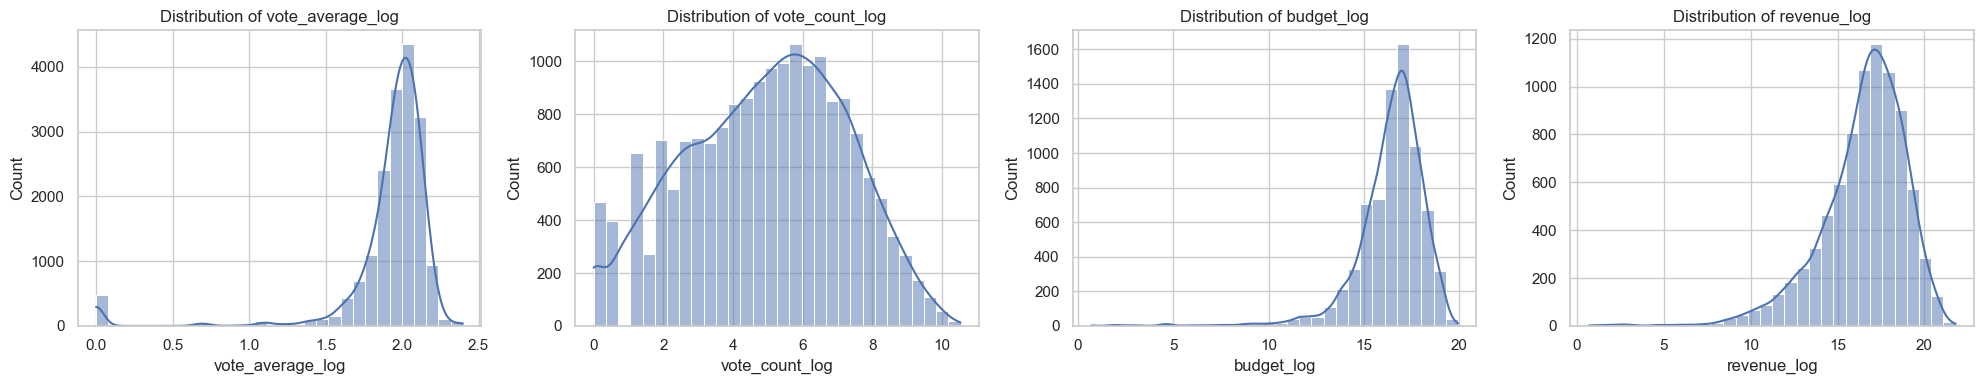

In [37]:
# Normalize skewed columns using log1p to reduce the effect of outliers
for col in skewed_cols:
    norm_col = f"{col}_log"
    # Avoid log(0) and negative values
    movies_df_cleaned[norm_col] = np.log1p(movies_df_cleaned[col].clip(lower=0))

# Plot the distribution of normalized columns
fig, axes = plt.subplots(nrows=1, ncols=len(skewed_cols), figsize=(20, 4))
for i, col in enumerate(skewed_cols):
    if col != 'id':
        norm_col = f"{col}_log"
        sns.histplot(movies_df_cleaned[norm_col], bins=30, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {norm_col}')
        axes[i].set_xlabel(norm_col)
        axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [38]:
import ast

# Save the cleaned DataFrame to CSV
movies_df_cleaned.to_csv('movies_df_cleaned.csv', index=False)

# Read the cleaned data back for EDA & Visualization
movies_df_cleaned = pd.read_csv('movies_df_cleaned.csv')

# Convert stringified lists back to lists
for col in ['genres', 'production_countries', 'spoken_languages']:
    movies_df_cleaned[col] = movies_df_cleaned[col].apply(ast.literal_eval)

# Convert release_date to datetime
movies_df_cleaned['release_date'] = pd.to_datetime(movies_df_cleaned['release_date'], errors='coerce')
movies_df_cleaned.dtypes

id                               int64
title                           object
original_title                  object
overview                        object
release_date            datetime64[ns]
original_language               object
popularity                     float64
vote_average                   float64
vote_count                       int64
genres                          object
runtime                          int64
budget                         float64
revenue                        float64
production_countries            object
spoken_languages                object
release_year                     int64
release_month                    int64
release_day                      int64
vote_average_log               float64
vote_count_log                 float64
budget_log                     float64
revenue_log                    float64
dtype: object

### EDA & Visualizations

##### Genre Evolution Analysis

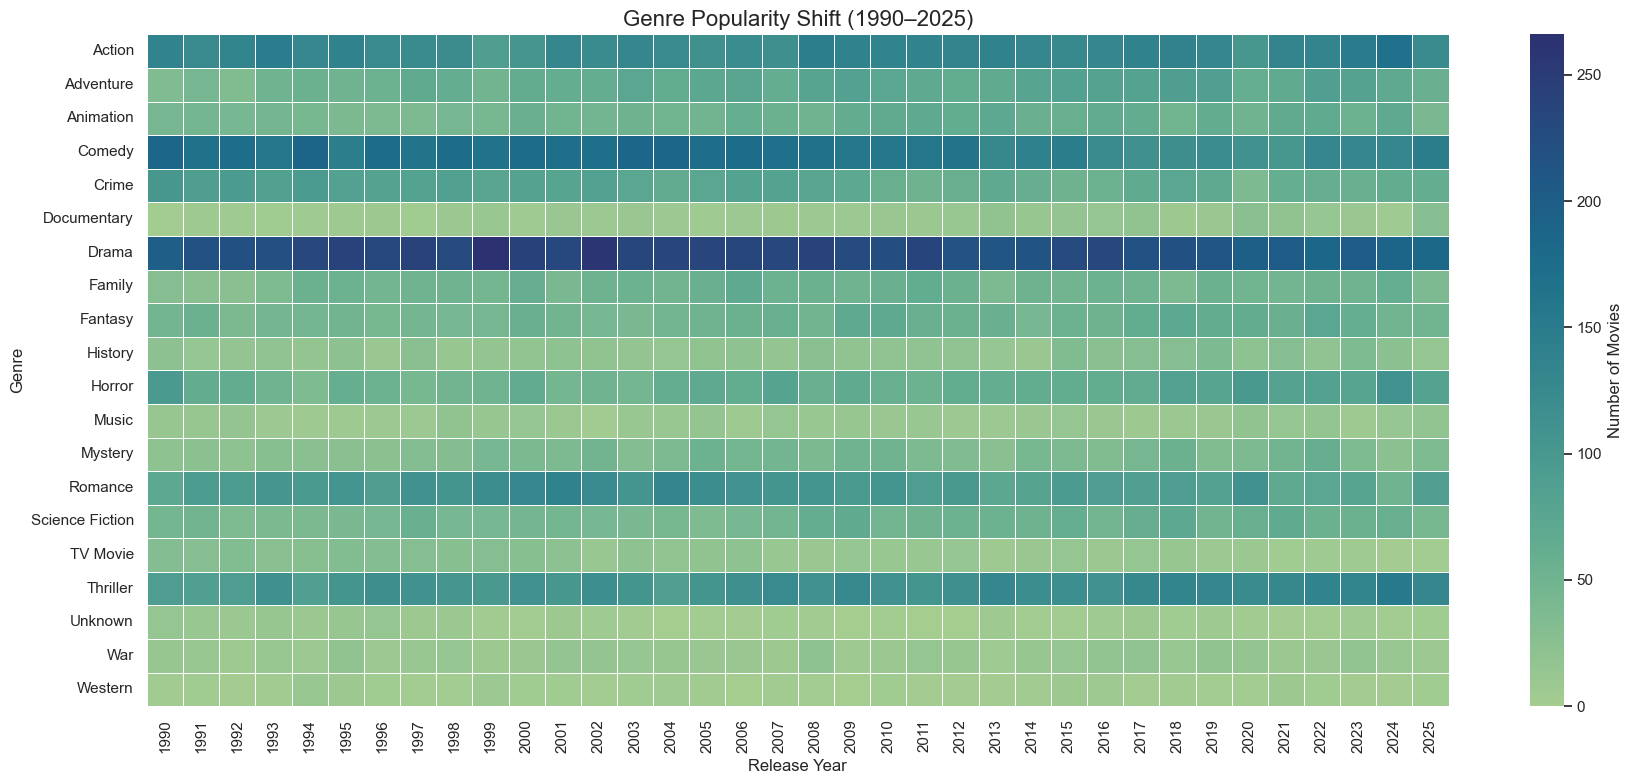

In [39]:
# How has genre popularity shifted from 1990 to 2025?
genre_year_df = movies_df_cleaned.explode('genres')
genre_counts = genre_year_df.groupby(['release_year', 'genres']).size().reset_index(name='count')
genre_pivot = genre_counts.pivot(index='release_year', columns='genres', values='count').fillna(0)

# Plot heatmap of genre popularity over time
plt.figure(figsize=(18, 8))
sns.heatmap(genre_pivot.T, cmap='crest', linewidths=0.5, cbar_kws={'label': 'Number of Movies'})
plt.title('Genre Popularity Shift (1990–2025)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**How has genre popularity shifted from 1990 to 2025?**
- **Drama, Comedy, and Action** have consistently been the most produced genres throughout the years.
- **Thriller** and **Crime** genres maintain steady popularity, with some fluctuations.
- **Animation** and **Family** genres show a noticeable increase in the 2000s and 2010s, likely reflecting the rise of animated blockbusters and family-oriented films.
- **Documentary** films see a gradual increase, especially in the 2010s and 2020s, indicating growing audience interest in non-fiction content.
- **TV Movie** and **Western** genres remain less common, with only occasional spikes.
- The **Unknown** category appears sporadically, likely representing movies with missing or ambiguous genre data.
- The 2020s show a slight dip in some genres, which may be due to incomplete data for recent years.

Overall, while traditional genres like Drama and Comedy remain dominant, there is a clear diversification and growth in genres such as Animation, Science Fiction, and Documentary over the past three decades.

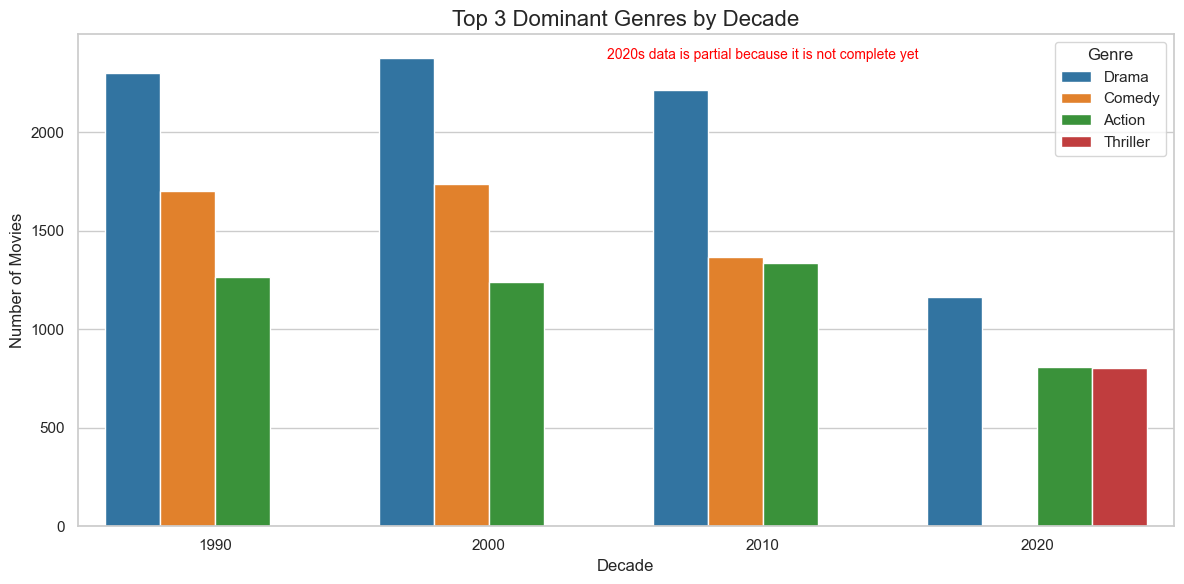

In [40]:
# Which genres dominate different decades?
genre_year_df['decade'] = (genre_year_df['release_year'] // 10) * 10
decade_genre_counts = genre_year_df.groupby(['decade', 'genres']).size().reset_index(name='count')
top_genres_per_decade = decade_genre_counts.sort_values(['decade', 'count'], ascending=[True, False]).groupby('decade').head(3)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_genres_per_decade,
    x='decade',
    y='count',
    hue='genres',
    palette='tab10'
)
plt.title('Top 3 Dominant Genres by Decade', fontsize=16)
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.tight_layout()
plt.text(2, plt.ylim()[1]*0.95, '2020s data is partial because it is not complete yet', fontsize=10, color='red', ha='center')
plt.show()

**Which genres dominate different decades?**
- **1990s:** The most dominant genres were **Drama**, **Comedy**, and **Action**. Drama led by a significant margin, reflecting the era's focus on character-driven and narrative-rich films. Comedy and Action also maintained strong popularity.

- **2000s:** The trend remained similar, with **Drama** still leading, followed by **Comedy** and **Action**. This suggests a continued audience preference for dramatic storytelling, while comedies and action films sustained their mass-market draw.

- **2010s:** **Drama** continued to be the top genre, but **Comedy** and **Action** are almost all same.

- **2020s:** (Note: Data is partial and incomplete for this decade.) **Action** has become the most produced genre, with **Drama** and **Thriller** following. This indicates a possible shift in industry focus toward action-packed and suspenseful content, perhaps influenced by streaming trends and changing audience preferences.

**Summary:**  
While **Drama** has consistently been a leading genre across decades, **Action** has grown in prominence, especially in recent years. **Comedy** was a strong contender in most of the years. This evolution highlights changing audience tastes and industry trends over time.

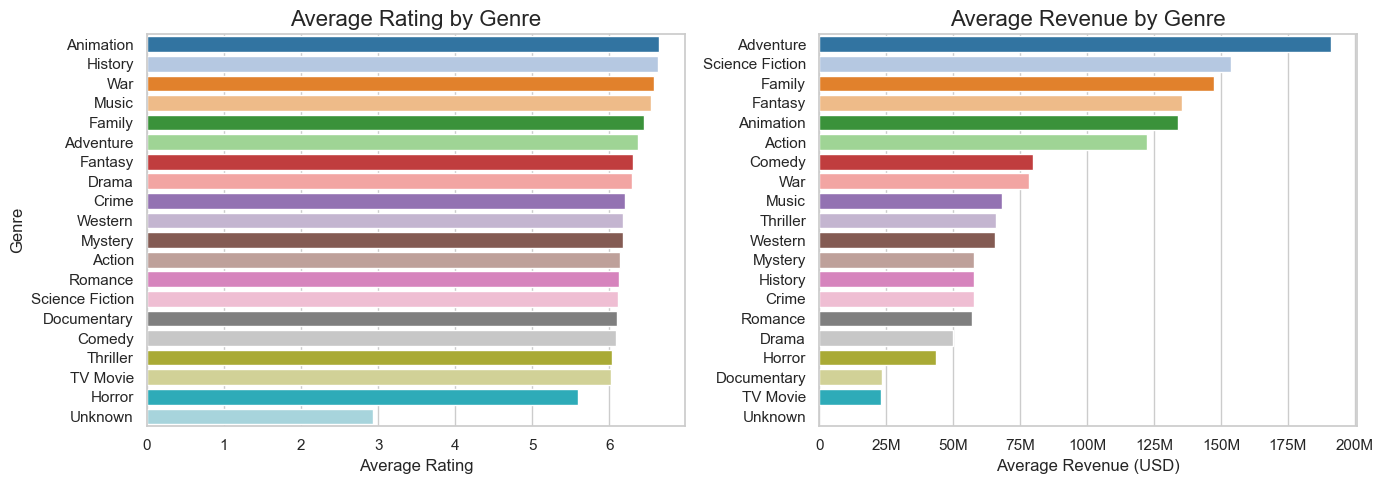

In [41]:
# Are certain genres associated with higher ratings or revenue?
from matplotlib.ticker import FuncFormatter

# Calculate average rating and average revenue per genre
genre_stats = genre_year_df.groupby('genres').agg(
    avg_rating=('vote_average', 'mean'),
    avg_revenue=('revenue', 'mean'),
    count=('id', 'count')
).reset_index()

# Sort by average rating and plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=genre_stats.sort_values('avg_rating', ascending=False),
    x='avg_rating', y='genres', palette='tab20'
)
plt.title('Average Rating by Genre', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Genre')

# Sort by average revenue and plot
plt.subplot(1, 2, 2)
sns.barplot(
    data=genre_stats.sort_values('avg_revenue', ascending=False),
    x='avg_revenue', y='genres', palette='tab20'
)
plt.title('Average Revenue by Genre', fontsize=16)
plt.xlabel('Average Revenue (USD)')
plt.ylabel('')
# Format x-axis
def millions(x, pos):
    if x >= 1e6:
        return f'{x*1.0/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x*1.0/1e3:.0f}K'
    else:
        return f'{int(x)}'
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()

**Are certain genres associated with higher ratings or revenue?**

The bar plots show that some genres are indeed associated with higher average ratings and/or higher average revenue.
- Genres like Animation, History, War, and Music tend to have the highest average ratings.
- Genres such as Adventure, Science Fiction, Family, and Fantasy have the highest average revenues.
- Genres like Horror have lower average ratings and lower average revenue.

##### Financial Analysis

In [42]:
# Remove rows where budget or revenue is zero or NaN for financial analysis
financial_df = movies_df_cleaned.dropna(subset=['budget', 'revenue'])
financial_df = financial_df[(financial_df['budget'] > 0) & (financial_df['revenue'] > 0)]

print(f"Rows remaining for financial analysis: {len(financial_df)}")
financial_df[['title', 'budget', 'revenue']].head()

Rows remaining for financial analysis: 6341


,title,budget,revenue
0,GoodFellas,25000000.0,46800000.0
1,Edward Scissorhands,20000000.0,86024005.0
2,Pretty Woman,14000000.0,463406268.0
3,The Godfather Part III,54000000.0,136766062.0
4,Ghost,22000000.0,505000000.0


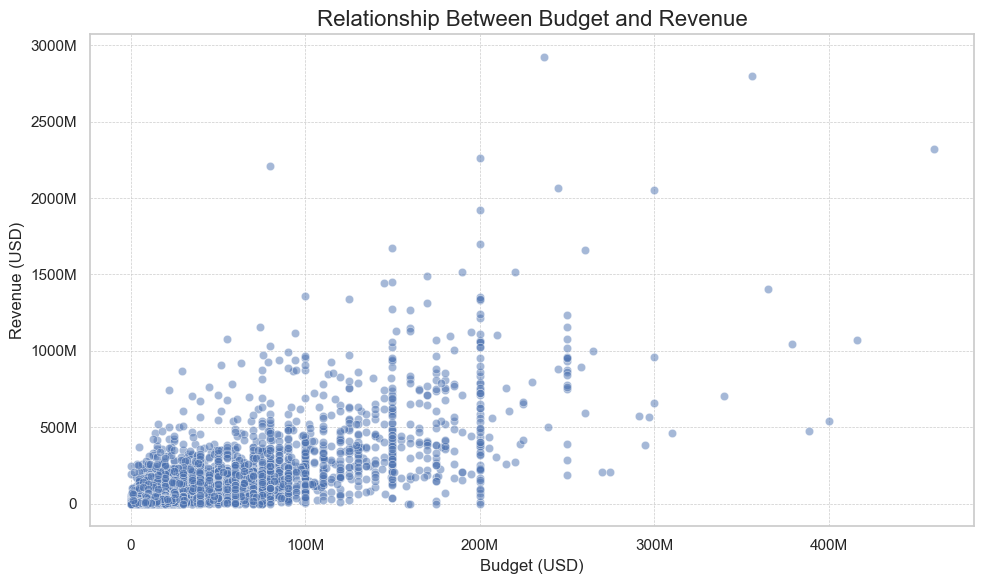

Correlation between budget and revenue: 0.72


In [43]:
# What's the relationship between budget and revenue?
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=financial_df,
    x='budget',
    y='revenue',
    alpha=0.5
)
plt.title('Relationship Between Budget and Revenue', fontsize=16)
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
# plt.xscale('log')
# plt.yscale('log')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calculate and print the correlation coefficient
corr = movies_df_cleaned[['budget', 'revenue']].corr().loc['budget', 'revenue']
print(f"Correlation between budget and revenue: {corr:.2f}")

**What's the relationship between budget and revenue?**

The scatter plot of Budget vs Revenue shows a clear positive relationship: movies with higher budgets generally tend to generate higher revenues. However, the correlation is not perfect—there is significant spread, especially among lower-budget films, indicating that a large budget does not guarantee high revenue, and some lower-budget films can still achieve substantial earnings.

The data points cluster in the lower-left region, representing movies with modest budgets and revenues. A few outliers with very high budgets and revenues are visible in the upper-right, likely representing blockbuster films.

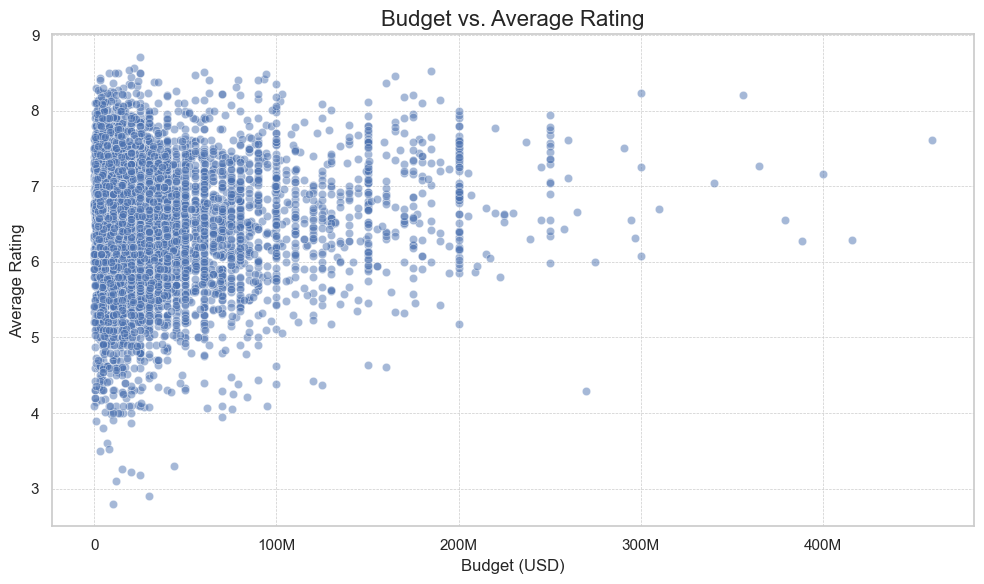

Correlation between budget and average rating: 0.11


In [44]:
# Do higher budgets guarantee better ratings?
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=financial_df,
    x='budget',
    y='vote_average',
    alpha=0.5
)
plt.title('Budget vs. Average Rating', fontsize=16)
plt.xlabel('Budget (USD)')
plt.ylabel('Average Rating')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calculate and print the correlation coefficient
corr_budget_rating = movies_df_cleaned[['budget', 'vote_average']].corr().loc['budget', 'vote_average']
print(f"Correlation between budget and average rating: {corr_budget_rating:.2f}")

**Do higher budgets guarantee better ratings?**
- There is no strong correlation between budget and average rating (as indicated by the low correlation coefficient).
- Movies with both low and high budgets can receive a wide range of ratings, from poor to excellent.
- High-budget films do not guarantee higher ratings; many lower-budget films also achieve high ratings.
- The spread of points suggests that budget alone do not play a significant role in determining a movie's reception.

Spending more on production does not necessarily result in better-rated movies. Quality and audience appreciation depend on multiple factors beyond just financial investment.

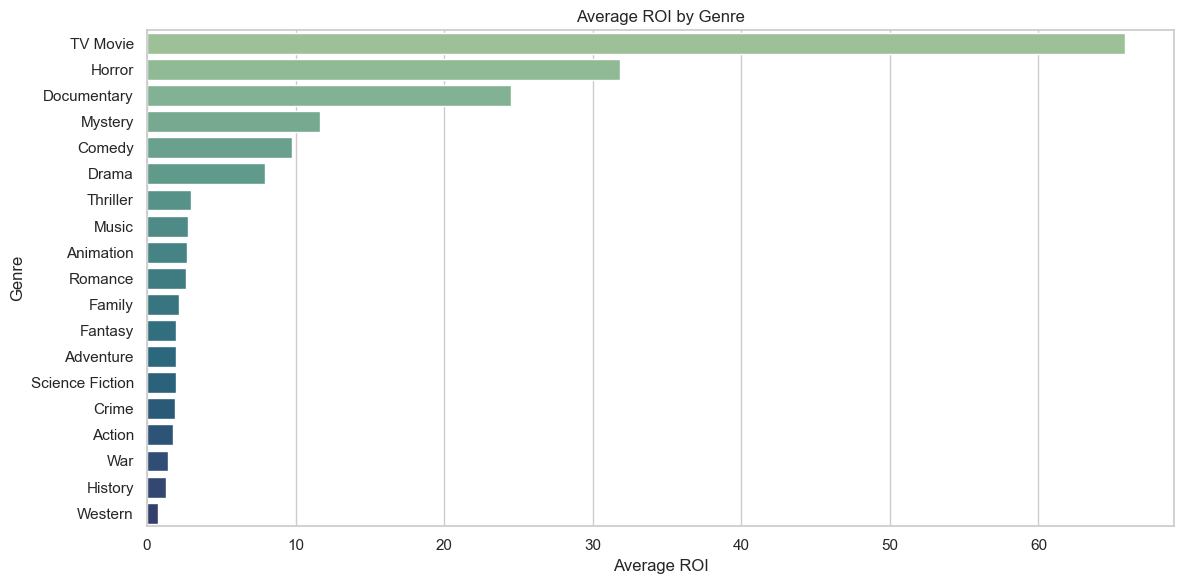

In [45]:
# Which genres give the best ROI?
financial_df['roi'] = (financial_df['revenue'] - financial_df['budget']) / financial_df['budget']

roi_genre_df = financial_df.explode('genres')
genre_roi = roi_genre_df.groupby('genres')['roi'].mean().sort_values(ascending=False).reset_index()

# Plot average ROI by genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_roi, x='roi', y='genres', palette='crest')
plt.title('Average ROI by Genre')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Which genres give the best ROI?**
- The genres with the highest Return on Investment (ROI) are **TV Movie**, **Horror**, and **Documentary**.
- On the other hand, genres like **History**, **War**, and **Western**, typically have lower returns on investment (ROI), making them riskier financially even though they bring in a lot of money at the box office.

##### Geographic & Language Insights

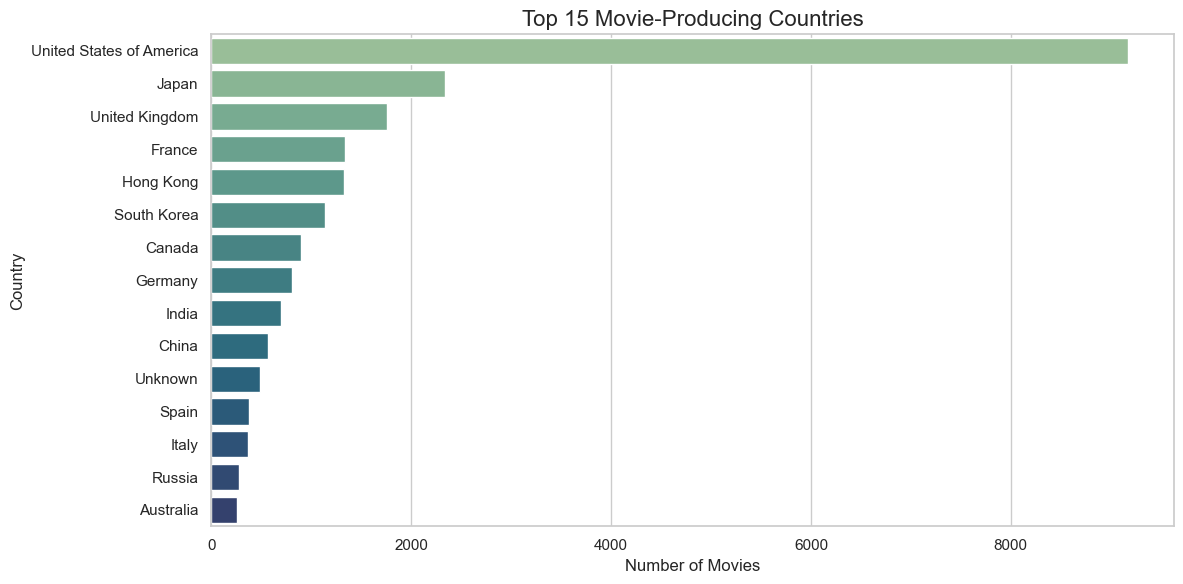

In [46]:
# Which countries dominate movie production?
from collections import Counter

all_countries = movies_df_cleaned.explode('production_countries')['production_countries']
country_counts = Counter(all_countries)

# Convert to DataFrame for easier plotting
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Movie Count'])
country_counts_df = country_counts_df.sort_values('Movie Count', ascending=False).reset_index(drop=True)

# Plot the top 15 movie-producing countries
plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts_df.head(15), x='Movie Count', y='Country', palette='crest')
plt.title('Top 15 Movie-Producing Countries', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Which countries dominate movie production?**

Global film production is dominated by the **United States of America**, with the **Japan** and **United Kingdom** following far behind.  In addition, contributors like **France** and **Hong Kong** looks like they compete with each other. On the ohter hand, **Italy**, **Russia**, and **Australia** have less movie production, suggests that people are less interested in regional or international movies in those countries.

In [47]:
movies_df_cleaned['original_language'].unique()

array(['en', 'ja', 'fr', 'cn', 'de', 'es', 'zh', 'sh', 'ar', 'it', 'ru',
       'ko', 'fa', 'hi', 'pl', 'te', 'ta', 'fi', 'el', 'sv', 'nl', 'cs',
       'ml', 'tl', 'kn', 'sk', 'vi', 'da', 'hu', 'mk', 'sr', 'th', 'no',
       'tr', 'pt', 'ur', 'he', 'bn', 'bo', 'bs', 'xx', 'tn', 'ku', 'ro',
       'uk', 'pa', 'lt', 'is', 'id', 'af', 'et', 'mr', 'km', 'gl', 'si',
       'eu', 'az', 'sq', 'dz', 'mn', 'ga', 'ho', 'io', 'ca', 'ki', 'lv',
       'ms', 'or', 'ka'], dtype=object)

In [48]:
# Map the original languages to their full names
lang = tuple(movies_df_cleaned['original_language'].unique())
lang_representation = (
    "English", "Japanese", "French", "Chinese(Simplified)", "German", "Spanish", "Chinese(Traditional)", "Serbo-Croatian",
    "Arabic", "Italian", "Russian", "Korean", "Persian", "Hindi", "Polish", "Telugu", "Tamil",
    "Finnish", "Greek", "Swedish", "Dutch", "Czech", "Malayalam", "Tagalog", "Kannada", "Slovak",
    "Vietnamese", "Danish", "Hungarian", "Macedonian", "Serbian", "Thai", "Norwegian", "Turkish",
    "Portuguese", "Urdu", "Hebrew", "Bengali", "Tibetan", "Bosnian", "Unknown", "Tswana", "Kurdish",
    "Romanian", "Ukrainian", "Punjabi", "Lithuanian", "Icelandic", "Indonesian", "Afrikaans",
    "Estonian", "Marathi", "Khmer", "Galician", "Sinhala", "Basque", "Azerbaijani", "Albanian",
    "Dzongkha", "Mongolian", "Irish", "Hiri Motu", "Ido", "Catalan", "Kikuyu", "Latvian", "Malay",
    "Odia", "Georgian"
)

language_map = dict(zip(lang, lang_representation))
language_map

{'en': 'English',
 'ja': 'Japanese',
 'fr': 'French',
 'cn': 'Chinese(Simplified)',
 'de': 'German',
 'es': 'Spanish',
 'zh': 'Chinese(Traditional)',
 'sh': 'Serbo-Croatian',
 'ar': 'Arabic',
 'it': 'Italian',
 'ru': 'Russian',
 'ko': 'Korean',
 'fa': 'Persian',
 'hi': 'Hindi',
 'pl': 'Polish',
 'te': 'Telugu',
 'ta': 'Tamil',
 'fi': 'Finnish',
 'el': 'Greek',
 'sv': 'Swedish',
 'nl': 'Dutch',
 'cs': 'Czech',
 'ml': 'Malayalam',
 'tl': 'Tagalog',
 'kn': 'Kannada',
 'sk': 'Slovak',
 'vi': 'Vietnamese',
 'da': 'Danish',
 'hu': 'Hungarian',
 'mk': 'Macedonian',
 'sr': 'Serbian',
 'th': 'Thai',
 'no': 'Norwegian',
 'tr': 'Turkish',
 'pt': 'Portuguese',
 'ur': 'Urdu',
 'he': 'Hebrew',
 'bn': 'Bengali',
 'bo': 'Tibetan',
 'bs': 'Bosnian',
 'xx': 'Unknown',
 'tn': 'Tswana',
 'ku': 'Kurdish',
 'ro': 'Romanian',
 'uk': 'Ukrainian',
 'pa': 'Punjabi',
 'lt': 'Lithuanian',
 'is': 'Icelandic',
 'id': 'Indonesian',
 'af': 'Afrikaans',
 'et': 'Estonian',
 'mr': 'Marathi',
 'km': 'Khmer',
 'gl': 'Gali

In [49]:
movies_df_cleaned['language_name'] = movies_df_cleaned['original_language'].map(language_map)
movies_df_cleaned[['original_language', 'language_name']] # Verify the mapping

,original_language,language_name
0,en,English
1,en,English
2,en,English
3,en,English
4,en,English
...,...,...
17987,it,Italian
17988,zh,Chinese(Traditional)
17989,tr,Turkish
17990,th,Thai


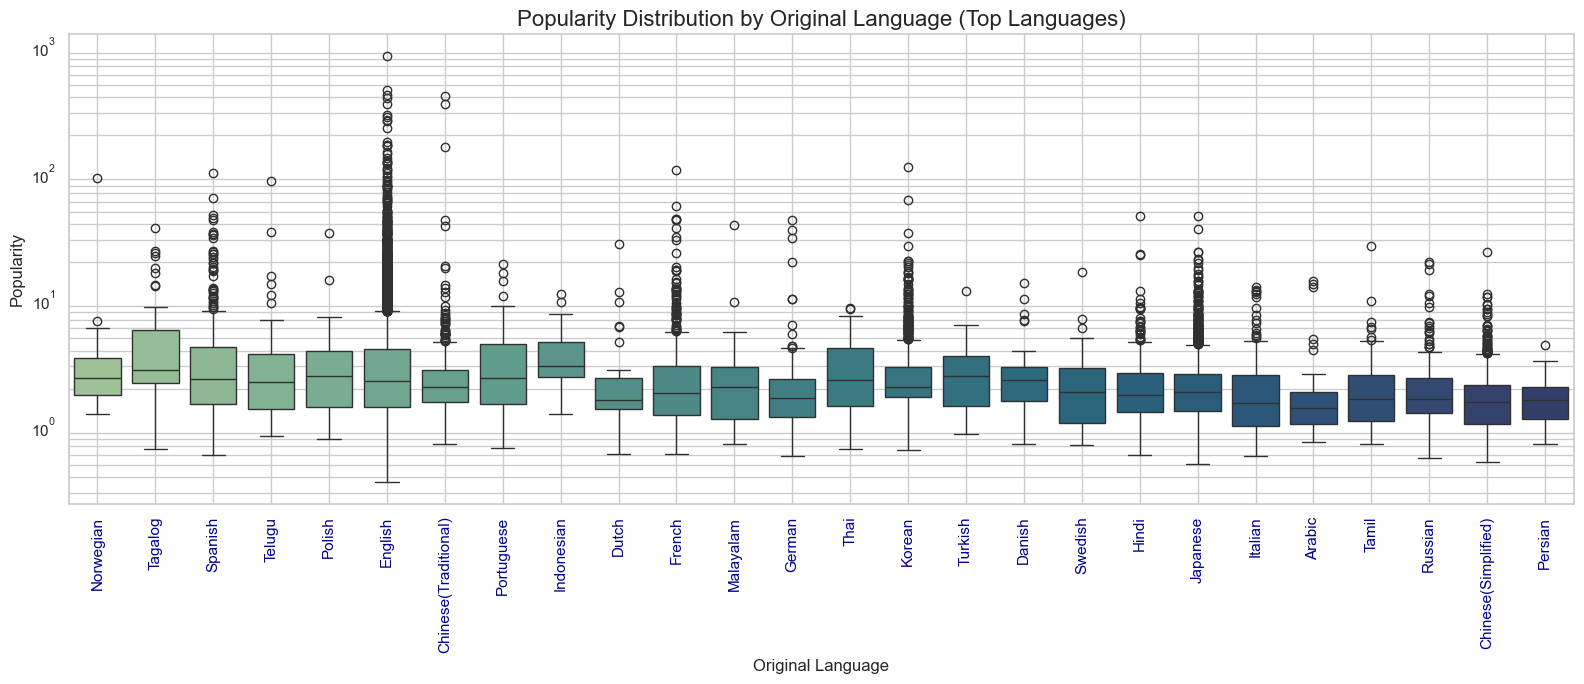

In [50]:
# Does original language impact popularity?
lang_popularity = movies_df_cleaned.groupby('language_name').agg(
    avg_popularity=('popularity', 'mean'),
    movie_count=('id', 'count')
).reset_index()

# Filter to languages with a reasonable number of movies (e.g., >20)
lang_popularity_filtered = lang_popularity[lang_popularity['movie_count'] > 20].sort_values('avg_popularity', ascending=False)

plt.figure(figsize=(16, 7))
sns.boxplot(
    data=movies_df_cleaned[movies_df_cleaned['language_name'].isin(lang_popularity_filtered['language_name'])],
    x='language_name',
    y='popularity',
    order=lang_popularity_filtered['language_name'],
    palette='crest'
)
plt.title('Popularity Distribution by Original Language (Top Languages)', fontsize=16)
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.xticks(color='darkblue', rotation=90)
plt.yscale('log')
plt.grid(which='both')
plt.tight_layout()
plt.show()

`Note`: Box plots are heavily compressed at the lower end, making it very difficult to observe the distributions clearly, especially the interquartile ranges and medians for most languages. In order to make the box plots more observable, I used Logarithmic Scale for the Y-axis.

**Does original language impact popularity?**

We can observe that the original language significantly impacts popularity.
- The median popularity (the horizontal line inside each box) varies considerably across languages.

In [51]:
# Top 10 movies by popularity
top_10_movies = movies_df_cleaned.sort_values('popularity', ascending=False).head(10)
top_10_movies[['title', 'genres', 'language_name', 'release_year', 'popularity', 'vote_average']].reset_index(drop=True)

,title,genres,language_name,release_year,popularity,vote_average
0,Final Destination Bloodlines,"[Horror, Mystery]",English,2025,851.0718,7.209
1,The Twisters,"[Action, Adventure, Drama]",English,2024,456.3560,5.500
2,Lilo & Stitch,"[Family, Science Fiction, Comedy, Adventure]",English,2025,418.9379,7.105
3,Crazy Lizard,"[Action, Thriller, Horror]",Chinese(Traditional),2024,407.9753,6.133
4,Distant,"[Science Fiction, Comedy, Action]",English,2024,393.3460,6.258
5,How to Train Your Dragon,"[Fantasy, Family, Action]",English,2025,351.4487,7.924
6,Candle in the Tomb: The Worm Valley,"[Action, Adventure, Horror]",Chinese(Traditional),2023,350.8280,6.500
7,28 Years Later,"[Horror, Thriller, Science Fiction]",English,2025,291.3007,7.130
8,KPop Demon Hunters,"[Animation, Fantasy, Action, Comedy, Music]",English,2025,281.0059,8.723
9,The Amateur,"[Thriller, Action]",English,2025,263.2979,6.958


In [52]:
# How do regional films perform financially?
regional_financial_df = financial_df[financial_df['original_language'] != 'en']

regional_financial_stats = regional_financial_df.groupby('original_language').agg(
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean'),
    avg_roi=('roi', 'mean'),
    movie_count=('id', 'count')
).reset_index()

# Map language codes to full names for readability
regional_financial_stats['language_name'] = regional_financial_stats['original_language'].map(language_map)

regional_financial_stats_filtered = regional_financial_stats.sort_values('avg_roi', ascending=False)

regional_financial_stats_filtered['avg_budget'] = regional_financial_stats_filtered['avg_budget'].apply(lambda x: f"{int(round(x)):,}")
regional_financial_stats_filtered['avg_revenue'] = regional_financial_stats_filtered['avg_revenue'].apply(lambda x: f"{int(round(x)):,}")

regional_financial_stats_filtered[['language_name', 'avg_budget', 'avg_revenue', 'avg_roi', 'movie_count']]

,language_name,avg_budget,avg_revenue,avg_roi,movie_count
27,Marathi,"600,000","16,500,000",26.500000,1
37,Thai,"3,373,195","34,227,528",22.170581,6
21,Kannada,"7,467,000","75,429,274",18.104999,2
17,Indonesian,"1,451,739","9,871,936",16.771500,7
20,Japanese,"12,226,936","47,301,258",10.139342,95
0,Arabic,"2,684,035","33,114,054",7.578913,2
9,Spanish,"7,084,591","21,130,154",7.552902,68
14,Hebrew,"1,500,000","11,179,372",6.452915,1
4,Chinese(Simplified),"16,831,615","31,491,492",6.101018,48
26,Malayalam,"3,833,858","8,464,286",6.051197,7


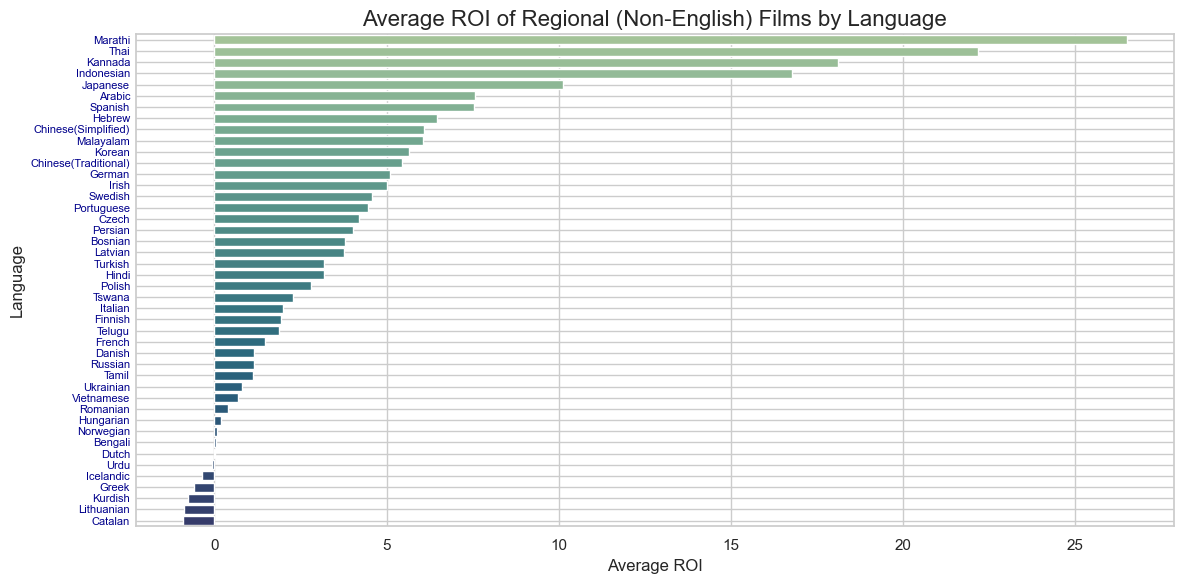

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=regional_financial_stats_filtered,
    x='avg_roi',
    y='language_name',
    palette='crest'
)
plt.title('Average ROI of Regional (Non-English) Films by Language', fontsize=16)
plt.xlabel('Average ROI')
plt.ylabel('Language')
plt.gca().tick_params(axis='y', pad=-2)
plt.yticks(color='darkblue', fontsize=8)
plt.grid(which='major', axis='y')
plt.tight_layout()
plt.show()

**How do regional films perform financially?**

Average ROI of Regional (Non-English) Films by Language reveals a highly varied financial performance across different regional markets.
- Top-tier regional films, particularly those in **Marathi**, **Thai**, **Kannada**, **Indonesian**, and **Japanese**, demonstrate exceptional financial success with significantly high average ROIs. This suggests strong market efficiency and audience engagement in these segments.
- The majority of other regional languages show positive average ROIs, indicating general profitability.
- Films in **Icelandic**, **Greek**, **Kurdish**, **Lithuanian**,, and **Catalan** languages show an average negative ROI, indicating a financial loss.

##### Popularity & Audience Engagement

Correlation of numeric features with popularity:
 popularity          1.000000
revenue             0.241809
budget              0.211194
release_year        0.167966
vote_count          0.167934
revenue_log         0.162671
id                  0.161610
budget_log          0.135207
vote_count_log      0.124099
vote_average        0.090914
vote_average_log    0.065204
runtime             0.038867
release_day         0.009214
release_month      -0.015609
Name: popularity, dtype: float64


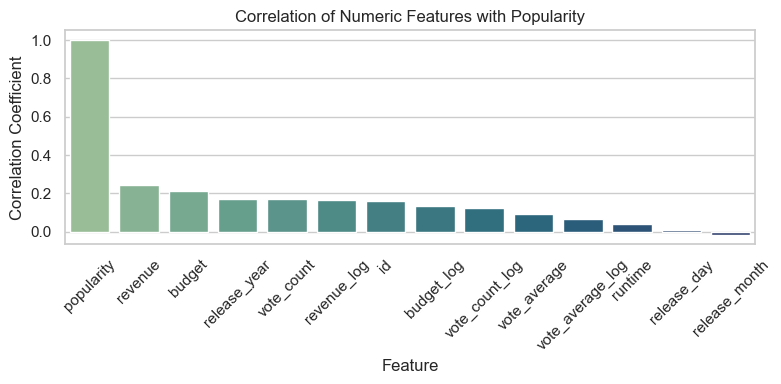

In [54]:
# Investigate what drives movie popularity using correlation and feature importance

# Correlation with popularity for numeric features
pop_corr = movies_df_cleaned.corr(numeric_only=True)['popularity'].sort_values(ascending=False)
print("Correlation of numeric features with popularity:\n", pop_corr)

# Visualize correlation with popularity
plt.figure(figsize=(8, 4))
sns.barplot(x=pop_corr.index, y=pop_corr.values, palette='crest')
plt.title('Correlation of Numeric Features with Popularity')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 25.449
Mean Absolute Error (MAE): 0.970
R^2 Score: 0.834


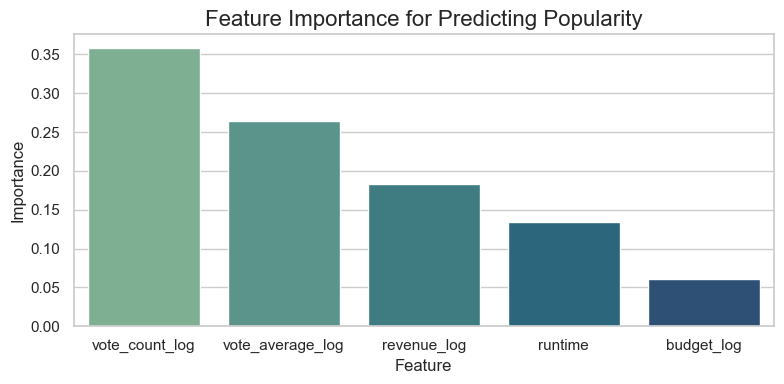

Top features driving movie popularity:
 vote_count_log      0.357965
vote_average_log    0.263842
revenue_log         0.182636
runtime             0.134749
budget_log          0.060808
dtype: float64


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare features
feature_cols = ['vote_average_log', 'vote_count_log', 'runtime', 'budget_log', 'revenue_log']
X = movies_df_cleaned[feature_cols].fillna(0)
y = movies_df_cleaned['popularity']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict on the training data
y_pred = rf.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Investigate the feature importance
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Plot the feature importance for Predicting Popularity
plt.figure(figsize=(8, 4))
sns.barplot(x=importances.index, y=importances.values, palette='crest')
plt.title('Feature Importance for Predicting Popularity', fontsize=16)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

print("Top features driving movie popularity:\n", importances)

Correlation between vote_count and revenue: 0.73


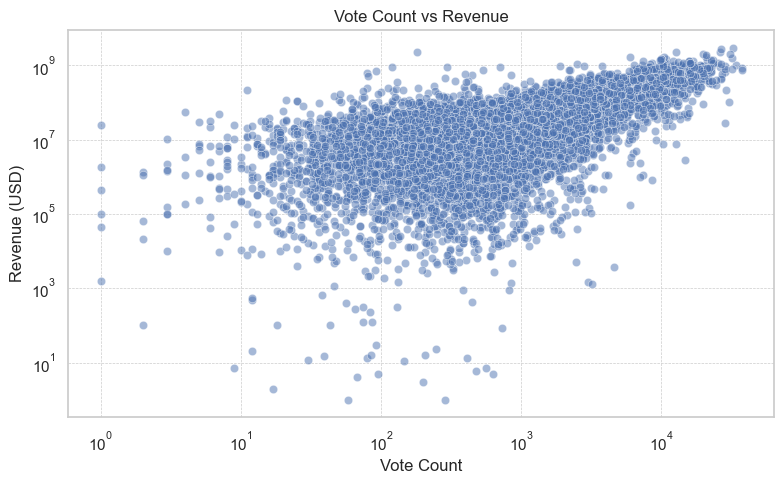

In [57]:
# Is there correlation between vote_count and revenue?
corr_vote_count_revenue = movies_df_cleaned[['vote_count', 'revenue']].corr().loc['vote_count', 'revenue']
print(f"Correlation between vote_count and revenue: {corr_vote_count_revenue:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=movies_df_cleaned, x='vote_count', y='revenue', alpha=0.5)
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue (USD)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Is there correlation between vote_count and revenue?**
- There is a positive correlation between `vote_count` and `revenue`, as shown by the upward trend in the scatter plot.
- Movies with higher revenues generally tend to have more votes. However, the relationship is not perfectly linear—there is a wide spread, especially at lower vote counts and revenues.
- The calculated correlation coefficient confirms that movies earning more revenue typically receive more audience engagement in the form of votes.

##### Temporal Patterns

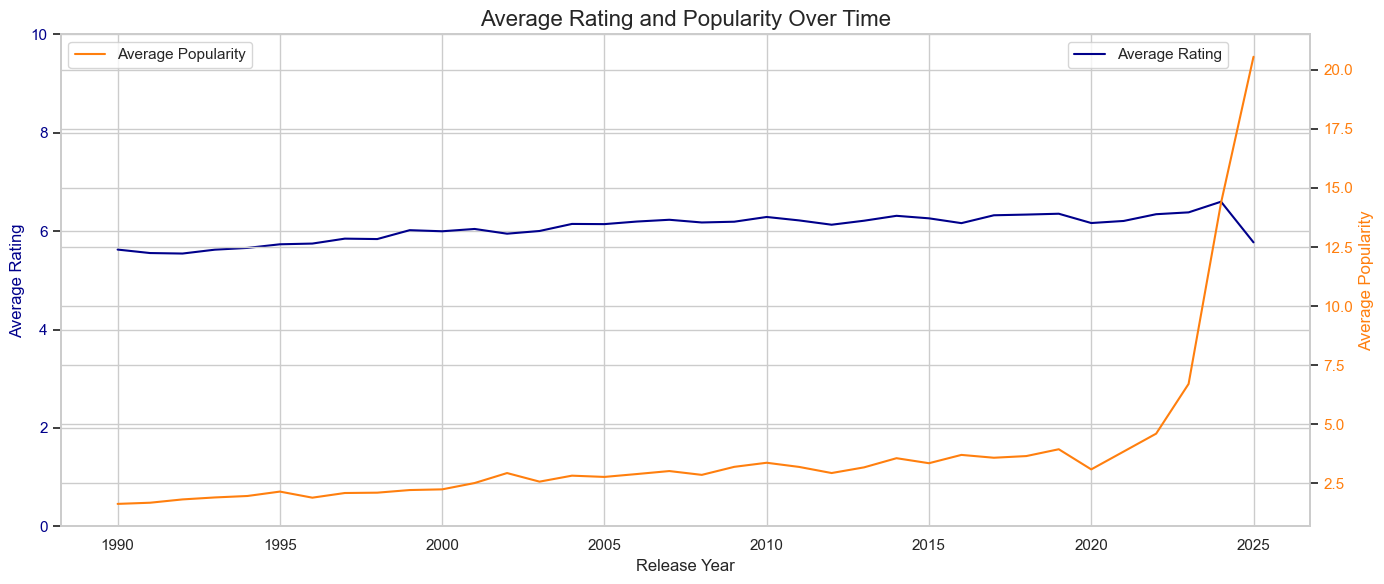

In [58]:
# Plot average rating and average popularity over time
fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = 'darkblue'
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average Rating', color=color1)
sns.lineplot(
    data=movies_df_cleaned,
    x='release_year',
    y='vote_average',
    ci=None,
    ax=ax1,
    color=color1,
    label='Average Rating'
)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 10)
ax1.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Average Popularity', color=color2)
sns.lineplot(
    data=movies_df_cleaned,
    x='release_year',
    y='popularity',
    ci=None,
    ax=ax2,
    color=color2,
    label='Average Popularity'
)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Average Rating and Popularity Over Time', fontsize=16)
fig.tight_layout()
plt.show()

**How do ratings and popularity fluctuate over time?**
- `Average Ratings`: From 1990 to 2025, the average movie score has been very steady, ranging between 6.0 and 7.0 over the entire period.  This indicates that there haven't been any notable long-term changes in the average opinion of film quality.
- `Average Popularity`: Although popularity increased gradually between 1990 and 2020, it then saw a rare and rapid rise starting in 2020, rising from levels usually below 15 to about 50 by 2025.  This dramatic rise suggests a notable recent acceleration in popularity, content consumption, or audience engagement.

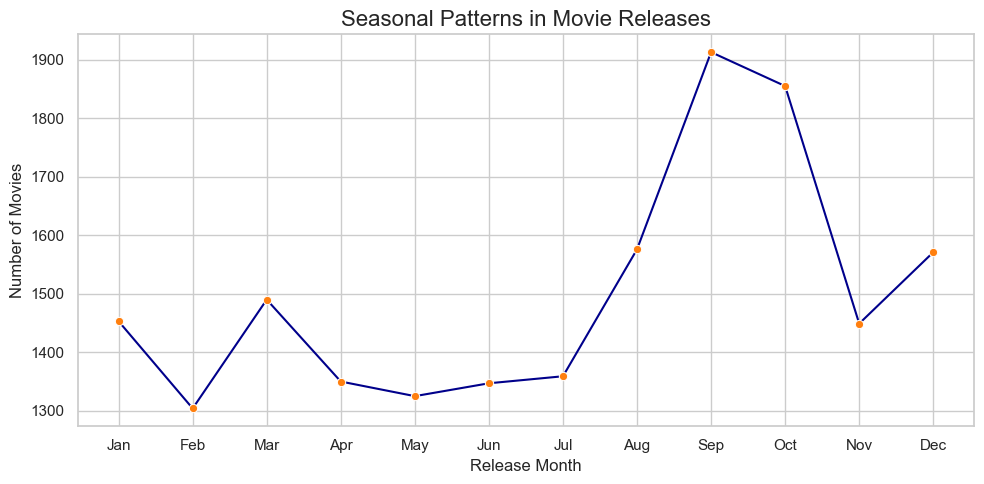

In [59]:
# Are there seasonal release patterns?
monthly_counts = movies_df_cleaned['release_month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    color='darkblue',
    marker='o',
    markerfacecolor='tab:orange'
)
plt.title('Seasonal Patterns in Movie Releases', fontsize=16)
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

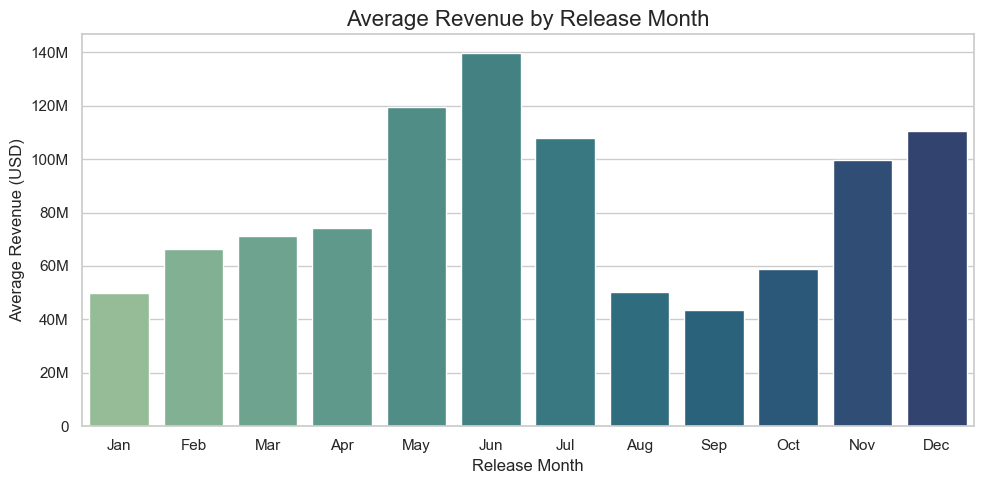

In [60]:
# Seasonal revenue patterns
avg_revenue_by_month = movies_df_cleaned.groupby('release_month')['revenue'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_revenue_by_month.index,
    y=avg_revenue_by_month.values,
    palette='crest'
)
plt.title('Average Revenue by Release Month', fontsize=16)
plt.xlabel('Release Month')
plt.ylabel('Average Revenue (USD)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()

**Seasonal revenue patterns**

- The data shows that revenue peaks sharply during two key periods: the summer months (May, June, July), with June being the highest revenue-generating month, and again during the year-end holiday season (November and December). These peaks align with periods of increased audience availability due to school and public holidays.
- January, August, and September are identified as months with significantly lower average revenues

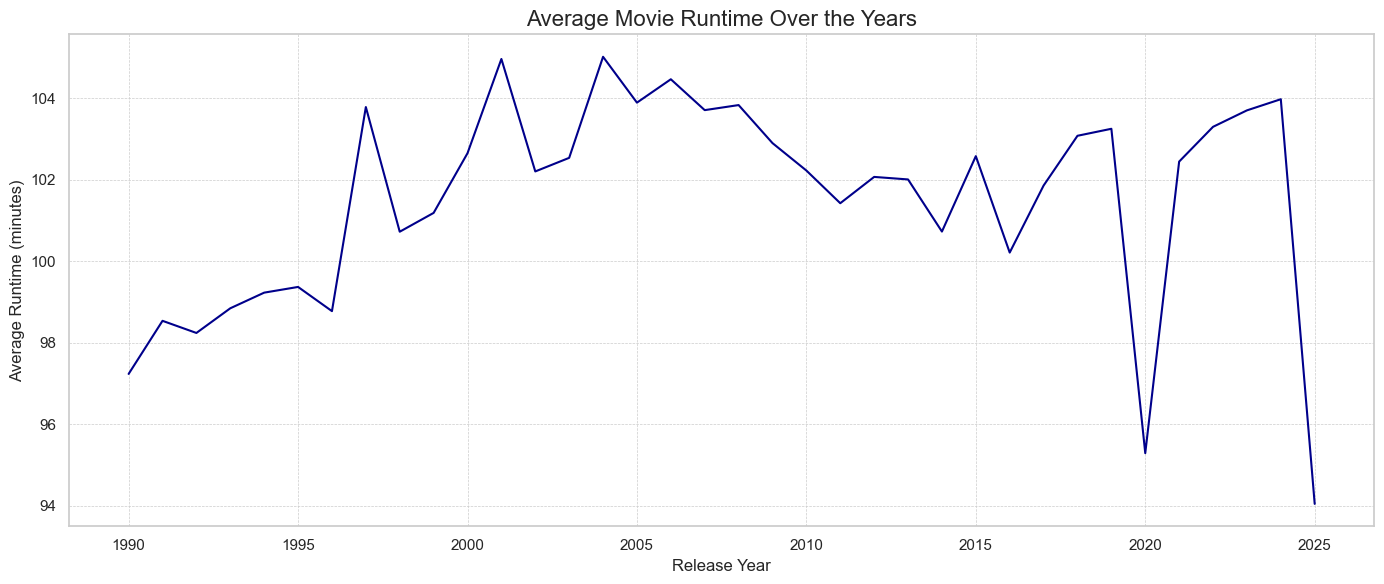

In [61]:
# How have movie runtimes changed?
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=movies_df_cleaned,
    x='release_year',
    y='runtime',
    ci=None,
    color='darkblue'
)
plt.title('Average Movie Runtime Over the Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

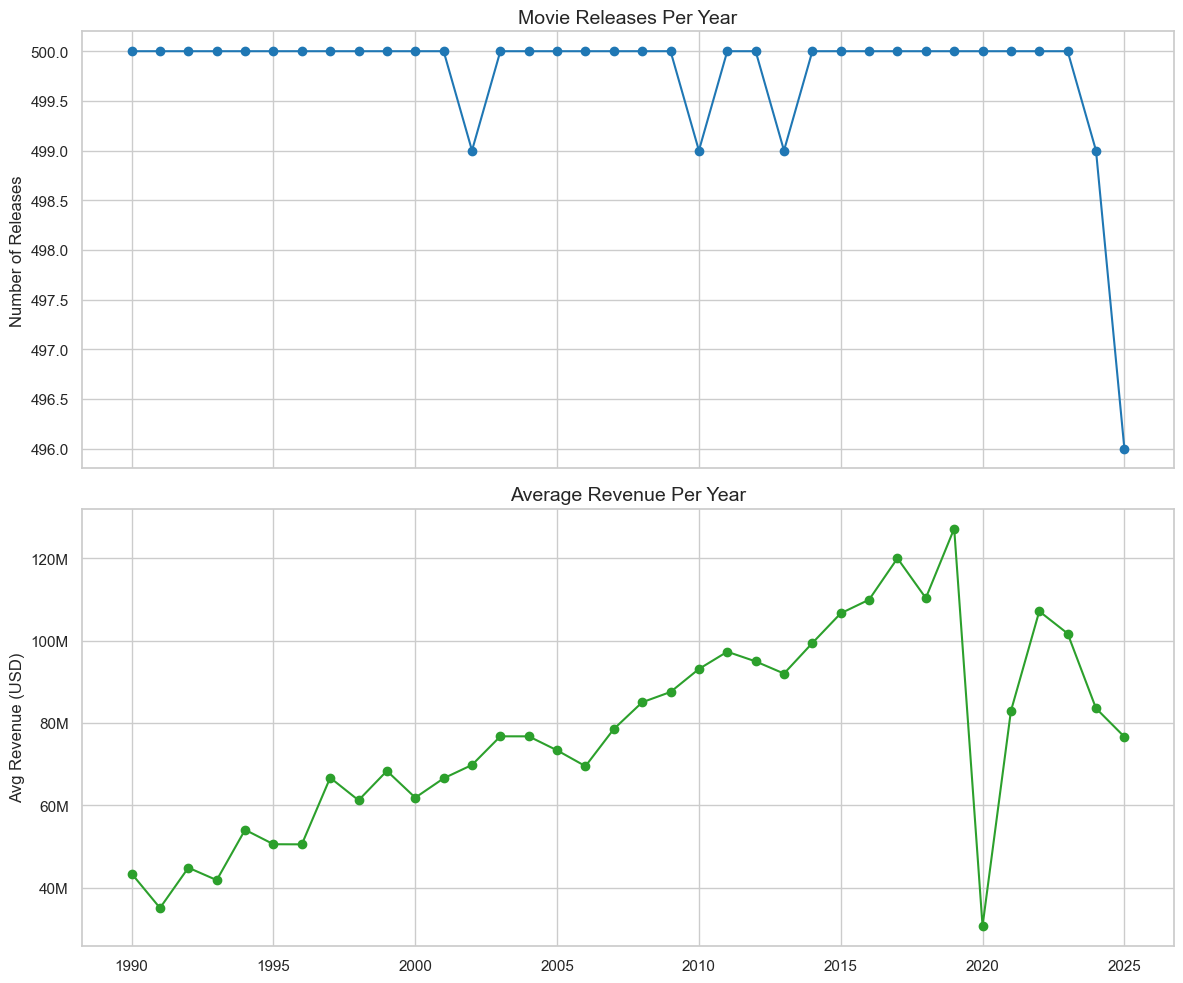

In [62]:
# Movie Releases and Revenue Over Time

# Movie releases per year
releases_per_year = movies_df_cleaned.groupby('release_year').size()

# Average revenue per year
avg_revenue_per_year = movies_df_cleaned.groupby('release_year')['revenue'].mean()

# Plot all time series together
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Movie releases
axes[0].plot(releases_per_year.index, releases_per_year.values, marker='o', color='tab:blue')
axes[0].set_ylabel('Number of Releases')
axes[0].set_title('Movie Releases Per Year', fontsize=14)

# Average revenue
axes[1].plot(avg_revenue_per_year.index, avg_revenue_per_year.values, marker='o', color='tab:green')
axes[1].set_ylabel('Avg Revenue (USD)')
axes[1].set_title('Average Revenue Per Year', fontsize=14)
axes[1].yaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()